In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.pyplot import plot as plt


In [4]:
df_raw = pd.read_csv('./KaDo.csv')

In [5]:
df_raw.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = df_raw.copy()

In [8]:
df = df.filter(['MOIS_VENTE', 'PRIX_NET', 'MAILLE', 'LIBELLE'])

In [9]:
df.columns

Index(['MOIS_VENTE', 'PRIX_NET', 'MAILLE', 'LIBELLE'], dtype='object')

In [10]:
 pie_chart_df = df.groupby(["MOIS_VENTE", "MAILLE"], as_index=True).sum().sort_values(by=["MOIS_VENTE", "PRIX_NET"], ascending=False)

In [16]:
pie_chart_df.unstack().T.fillna(0).reset_index(level=0, drop=True).tail()

MOIS_VENTE,1,2,3,4,5,6,7,8,9,10,11,12
MAILLE,,,,,,,,,,,,
MAQ_LEV_RAL_HMG,0.00,0.00,0.00,0.00,0.0,146977.50,0.00,0.00,0.00,86518.27,0.0,0.0
MAQ_ONGLES,0.00,0.00,94412.28,130253.76,0.0,0.00,0.00,165408.74,100870.09,0.00,0.0,0.0
SOLAIRE,0.00,0.00,0.00,0.00,159500.2,334309.65,320368.64,0.00,0.00,0.00,0.0,0.0
CORPS_SPA_ET_MINCEUR,107133.12,0.00,115710.71,97476.27,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0
PARF_HOMME,0.00,80097.11,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [ ]:
pie_chart_df.unstack().T.fillna(0)

MOIS_VENTE                                   1          2          3   \
         MAILLE                                                         
PRIX_NET PARF_PARFUM                  559302.40  351585.70  381960.96   
         HYG_PLAISIRNAT_BAIN_SAVON    149296.82  142034.03       0.00   
         VIS_AAAR_HORS_DEMAQLOTION    481008.09  448429.08  468815.48   
         VIS_JEUNE_ET_LEVRE           310937.39  219040.52  277175.26   
         MAQ_TEINT                    312092.43  259588.43  272330.69   
         CORPS_HYDRA_NOURRI_ET_SOINS  215691.36  162506.86  186124.09   
         MAQ_YEUX_MASCA_EYEL_FARD     284187.15  208254.04  243596.77   
         HYG_MONOI_ET_EDIT_SPEC            0.00       0.00       0.00   
         CORPS_HYDR_LAIT_HUILE             0.00       0.00       0.00   
         PARF_EDT                          0.00       0.00       0.00   
         MAQ_YEUX_CLASSIQUE           167922.04  104536.40  116541.30   
         HYG_JDM                      147552.63  100091.30  124207.83   
         MAQ_LEV_RAL_HMG                   0.00       0.00       0.00   
         MAQ_ONGLES                        0.00       0.00   94412.28   
         SOLAIRE                           0.00       0.00       0.00   
         CORPS_SPA_ET_MINCEUR         107133.12       0.00  115710.71   
         PARF_HOMME                        0.00   80097.11       0.00   

MOIS_VENTE                                   4          5          6   \
         MAILLE                                                         
PRIX_NET PARF_PARFUM                  475715.78  586284.44  504276.39   
         HYG_PLAISIRNAT_BAIN_SAVON         0.00       0.00  214803.52   
         VIS_AAAR_HORS_DEMAQLOTION    359483.39  396655.85  397005.40   
         VIS_JEUNE_ET_LEVRE           240373.86  250777.68  234540.90   
         MAQ_TEINT                    248616.97  267000.07  243515.75   
         CORPS_HYDRA_NOURRI_ET_SOINS  168560.65  196587.26  228285.34   
         MAQ_YEUX_MASCA_EYEL_FARD     206248.48  230911.06  231021.52   
         HYG_MONOI_ET_EDIT_SPEC            0.00       0.00       0.00   
         CORPS_HYDR_LAIT_HUILE             0.00       0.00       0.00   
         PARF_EDT                          0.00  187692.57  168811.50   
         MAQ_YEUX_CLASSIQUE           129433.48  135304.35       0.00   
         HYG_JDM                      113008.07  135597.33       0.00   
         MAQ_LEV_RAL_HMG                   0.00       0.00  146977.50   
         MAQ_ONGLES                   130253.76       0.00       0.00   
         SOLAIRE                           0.00  159500.20  334309.65   
         CORPS_SPA_ET_MINCEUR          97476.27       0.00       0.00   
         PARF_HOMME                        0.00       0.00       0.00   

MOIS_VENTE                                   7          8          9   \
         MAILLE                                                         
PRIX_NET PARF_PARFUM                  587442.33  375234.60  470746.94   
         HYG_PLAISIRNAT_BAIN_SAVON         0.00  138213.32  117446.63   
         VIS_AAAR_HORS_DEMAQLOTION    424515.10  325730.18  382150.72   
         VIS_JEUNE_ET_LEVRE           253444.87  227520.10  245927.43   
         MAQ_TEINT                    257793.71  189012.65  235377.30   
         CORPS_HYDRA_NOURRI_ET_SOINS  227622.24  160770.62  196405.23   
         MAQ_YEUX_MASCA_EYEL_FARD     250952.45  186155.64  269910.62   
         HYG_MONOI_ET_EDIT_SPEC            0.00       0.00       0.00   
         CORPS_HYDR_LAIT_HUILE             0.00       0.00       0.00   
         PARF_EDT                     155368.46       0.00       0.00   
         MAQ_YEUX_CLASSIQUE           163483.18  108009.01  112789.36   
         HYG_JDM                      155472.38  163311.17  158957.68   
         MAQ_LEV_RAL_HMG                   0.00       0.00       0.00   
         MAQ_ONGLES                        0.00  165408.74  100870.09   
         SOLAIRE                      320368.64       0.

In [ ]:
maille_array = df["MAILLE"].unique()

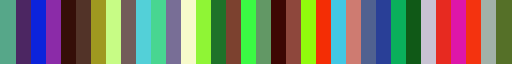

In [ ]:
from matplotlib.colors import ListedColormap
color_list = []

for maille in maille_array:
    color_list.append(list(np.random.choice(range(256), size=3) / 256))

color_list
newcmp = ListedColormap(color_list)

newcmp


array([<AxesSubplot:ylabel='1'>, <AxesSubplot:ylabel='2'>,
       <AxesSubplot:ylabel='3'>, <AxesSubplot:ylabel='4'>,
       <AxesSubplot:ylabel='5'>, <AxesSubplot:ylabel='6'>,
       <AxesSubplot:ylabel='7'>, <AxesSubplot:ylabel='8'>,
       <AxesSubplot:ylabel='9'>, <AxesSubplot:ylabel='10'>,
       <AxesSubplot:ylabel='11'>, <AxesSubplot:ylabel='12'>], dtype=object)

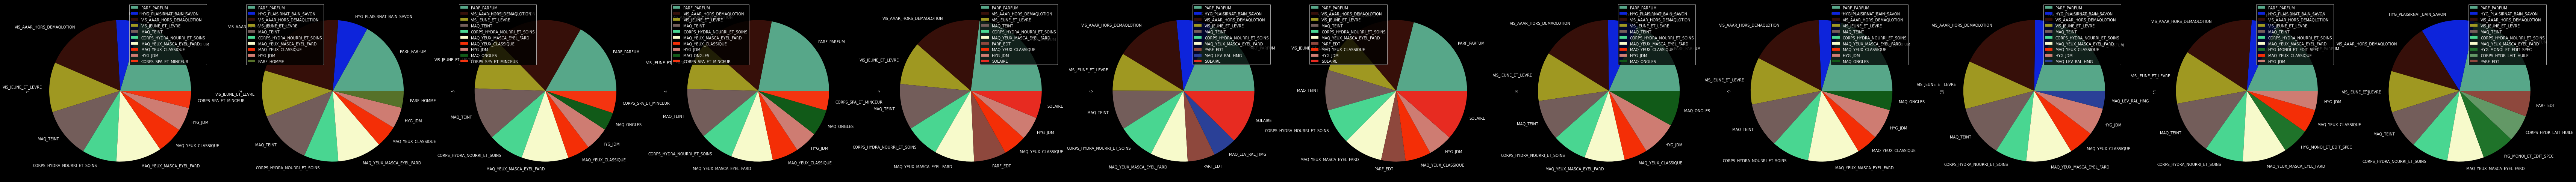

In [ ]:
pie_chart_df.unstack().T.fillna(0).reset_index(level=0, drop=True).plot.pie(figsize=(120, 60), colormap=newcmp, subplots=True)